#### Discrete Simulation HW7
#### Problem 2
Authored: Austin Jetrin Maddison 6481268

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from Demos.mmapfile_demo import offset
from sympy.physics.control.control_plots import matplotlib

from my_settings import *
from tabulate import tabulate

In [72]:
def calc_xray(n):
    sorted = np.arange(n) + 1
    perm = np.random.permutation(sorted)
    M = np.zeros((n,n), dtype=int)
    M[sorted-1, perm-1] = 1

    xray = np.zeros(n*2-1, dtype=int)
    for idx, i in enumerate(np.arange(n*2-1) - n+1):
        xray[idx] = np.diagonal(np.flipud(M), offset=i).sum()

    return xray


In [80]:
np.random.seed(27)
calc_xray(6)

array([0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0])

In [146]:
N = 100_000
ns = np.arange(2,10)
ns_N = np.tile(ns, (N,1))
f = np.vectorize(lambda n: calc_xray(n)[n] == n-2)

In [ ]:
res = f(ns_N)

+-------------+---------+--------+---------+---------+---------+---------+---------+-------+
|      n      |    2    |   3    |    4    |    5    |    6    |    7    |    8    |   9   |
+-------------+---------+--------+---------+---------+---------+---------+---------+-------+
| P(xray=n-1) | 0.49887 | 0.3314 | 0.12403 | 0.03251 | 0.00749 | 0.00125 | 0.00024 | 5e-05 |
+-------------+---------+--------+---------+---------+---------+---------+---------+-------+


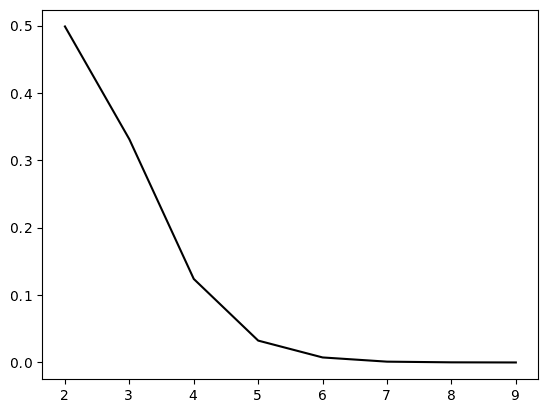

In [148]:
np.set_printoptions(suppress=True, precision=5)
plt.plot(ns, np.mean(res, axis=0), color='k')

table = [["n"] + ns.tolist(), ["P(xray=n-1)"] + np.mean(res, axis=0).tolist()]
print(tabulate(table, headers="firstrow", tablefmt="pretty"))